# Description -:

1. In This Jupyter Notebook Data cleaning was done only for year 2018-2023.

2. We used the data exported from ETL_PART_1 to maintain the data consistent over all of the years.

2. After cleaning the data, It was exported yearwise as CSV files for the Years 2015-2023.

In [9]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [10]:
# Reading the Data exported from ETL_PART_ONE to resources folder.
df1 = pd.read_csv("./resources/wh_2015.csv")
df2 = pd.read_csv("./resources/wh_2016.csv")
df3 = pd.read_csv("./resources/wh_2017.csv")
# Reading the CSVs for year 2018-2023 downloaded from Kaggle
df4 = pd.read_csv("./resources/2018.csv")
df5 = pd.read_csv("./resources/2019.csv")
df6 = pd.read_csv("./resources/2020.csv")
df7 = pd.read_csv("./resources/2021.csv")
df8 = pd.read_csv("./resources/2022.csv")
df9 = pd.read_csv("./resources/2023.csv")

In [11]:
df4.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [12]:
df4.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

In [13]:
df4 = df4.rename({
    'Country or region':'country',
    'Overall rank': 'happiness_rank',
    'Score':'happiness_score',
    'GDP per capita':'gdp_per_capita',
    'Social support':'social_support',
    'Healthy life expectancy':'life_expectancy',
    'Freedom to make life choices':'freedom_to_make_life_choices',
    'Generosity':'generosity',
    'Perceptions of corruption':'perceptions_of_corruption'
    }, axis =1)
df4.head()

,happiness_rank,country,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [14]:
duplicate_rows = df4[df4.duplicated()]
duplicate_rows

,happiness_rank,country,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption


In [15]:
df5.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

In [16]:
duplicate_rows = df5[df5.duplicated()]
duplicate_rows

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption


In [17]:
df5 = df5.rename({
    'Country or region':'country',
    'Overall rank': 'happiness_rank',
    'Score':'happiness_score',
    'GDP per capita':'gdp_per_capita',
    'Social support':'social_support',
    'Healthy life expectancy':'life_expectancy',
    'Freedom to make life choices':'freedom_to_make_life_choices',
    'Generosity':'generosity',
    'Perceptions of corruption':'perceptions_of_corruption'
    }, axis =1)
df5.head(1)

,happiness_rank,country,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,1,Finland,7.769,1.34,1.587,0.986,0.596,0.153,0.393


# Cleaning the data to keep the common countries data in years 2015, 2018 and 2019


In [18]:
# Find common country names among three dataframes
common_countries_mask = (
    df1['country'].isin(df4['country']) &
    df1['country'].isin(df5['country'])
)
# Keep only the rows with common country names
df1 = df1[common_countries_mask]
df4 = df4[df4['country'].isin(df1['country'])]
df5 = df5[df5['country'].isin(df1['country'])]

In [19]:
df1

,country,region,sub_region,iso_alpha,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Switzerland,Europe,Western Europe,CHE,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,Iceland,Europe,Northern Europe,ISL,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,Denmark,Europe,Northern Europe,DNK,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,Norway,Europe,Northern Europe,NOR,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
4,Canada,Americas,Northern America,CAN,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957
...,...,...,...,...,...,...,...,...,...,...,...
134,Rwanda,Africa,Sub-Saharan Africa,RWA,3.465,0.22208,0.77370,0.42864,0.59201,0.22628,0.55191
135,Benin,Africa,Sub-Saharan Africa,BEN,3.340,0.28665,0.35386,0.31910,0.48450,0.18260,0.08010
136,Syria,Asia,Western Asia,SYR,3.006,0.66320,0.47489,0.72193,0.15684,0.47179,0.18906
137,Burundi,Africa,Sub-Saharan Africa,BDI,2.905,0.01530,0.41587,0.22396,0.11850,0.19727,0.10062


In [20]:
df4

,happiness_rank,country,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
...,...,...,...,...,...,...,...,...,...
149,150,Syria,3.462,0.689,0.382,0.539,0.088,0.376,0.144
150,151,Rwanda,3.408,0.332,0.896,0.400,0.636,0.200,0.444
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097


In [21]:
df5

,happiness_rank,country,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
149,150,Malawi,3.410,0.191,0.560,0.495,0.443,0.218,0.089
150,151,Yemen,3.380,0.287,1.163,0.463,0.143,0.108,0.077
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147


In [22]:
df6.head(1)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.95433,71.900825,0.949172,-0.059482,0.195445,1.972317,1.28519,1.499526,0.961271,0.662317,0.15967,0.477857,2.762835


In [23]:
df6 = df6.drop(columns=['Regional indicator',
                        'Standard error of ladder score',
                        'upperwhisker',
                        'lowerwhisker',
                        'Logged GDP per capita',
                        'Social support',
                        'Freedom to make life choices',
                        'Generosity',
                        'Ladder score in Dystopia',
                        'Explained by: Healthy life expectancy',
                        'Explained by: Perceptions of corruption',
                        'Dystopia + residual'],axis=1)



In [24]:
df6.head(1)

,Country name,Ladder score,Healthy life expectancy,Perceptions of corruption,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Freedom to make life choices,Explained by: Generosity
0,Finland,7.8087,71.900825,0.195445,1.28519,1.499526,0.662317,0.15967


In [25]:
#Rename the columns for consistency
df6 = df6.rename({
    'Country name':'country',
    'Ladder score':'happiness_score',
    'Explained by: Log GDP per capita':'gdp_per_capita',
    'Explained by: Social support':'social_support',
    'Healthy life expectancy':'life_expectancy',
    'Explained by: Freedom to make life choices':'freedom_to_make_life_choices',
    'Explained by: Generosity':'generosity',
    'Perceptions of corruption':'perceptions_of_corruption'
    }, axis =1)
df6.head()

,country,happiness_score,life_expectancy,perceptions_of_corruption,gdp_per_capita,social_support,freedom_to_make_life_choices,generosity
0,Finland,7.8087,71.900825,0.195445,1.285190,1.499526,0.662317,0.159670
1,Denmark,7.6456,72.402504,0.168489,1.326949,1.503449,0.665040,0.242793
2,Switzerland,7.5599,74.102448,0.303728,1.390774,1.472403,0.628954,0.269056
3,Iceland,7.5045,73.000000,0.711710,1.326502,1.547567,0.661981,0.362330
4,Norway,7.4880,73.200783,0.263218,1.424207,1.495173,0.670201,0.287985


In [26]:
duplicate_rows = df6[df6.duplicated()]
duplicate_rows

,country,happiness_score,life_expectancy,perceptions_of_corruption,gdp_per_capita,social_support,freedom_to_make_life_choices,generosity


In [27]:
df7.head(1)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.78,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253


In [28]:
df7 = df7.drop(columns=['Regional indicator',
                        'Standard error of ladder score',
                        'upperwhisker',
                        'lowerwhisker',
                        'Logged GDP per capita',
                        'Social support',
                        'Freedom to make life choices',
                        'Generosity',
                        'Ladder score in Dystopia',
                        'Explained by: Healthy life expectancy',
                        'Explained by: Perceptions of corruption',
                        'Dystopia + residual'],axis=1)

In [29]:
df7.head(1)

,Country name,Ladder score,Healthy life expectancy,Perceptions of corruption,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Freedom to make life choices,Explained by: Generosity
0,Finland,7.842,72.0,0.186,1.446,1.106,0.691,0.124


In [30]:
#Rename the columns for consistency
df7 = df7.rename({
    'Country name':'country',
    'Ladder score':'happiness_score',
    'Explained by: Log GDP per capita':'gdp_per_capita',
    'Explained by: Social support':'social_support',
    'Healthy life expectancy':'life_expectancy',
    'Explained by: Freedom to make life choices':'freedom_to_make_life_choices',
    'Explained by: Generosity':'generosity',
    'Perceptions of corruption':'perceptions_of_corruption'
    }, axis =1)
df7.head()

,country,happiness_score,life_expectancy,perceptions_of_corruption,gdp_per_capita,social_support,freedom_to_make_life_choices,generosity
0,Finland,7.842,72.0,0.186,1.446,1.106,0.691,0.124
1,Denmark,7.620,72.7,0.179,1.502,1.108,0.686,0.208
2,Switzerland,7.571,74.4,0.292,1.566,1.079,0.653,0.204
3,Iceland,7.554,73.0,0.673,1.482,1.172,0.698,0.293
4,Netherlands,7.464,72.4,0.338,1.501,1.079,0.647,0.302


In [31]:
duplicate_rows = df7[df7.duplicated()]
duplicate_rows

,country,happiness_score,life_expectancy,perceptions_of_corruption,gdp_per_capita,social_support,freedom_to_make_life_choices,generosity


# Cleaning the data to keep the common countries data in years 2015, 2020 and 2021


In [32]:
# Find common country names among three dataframes
common_countries_mask = (
    df1['country'].isin(df6['country']) &
    df1['country'].isin(df7['country'])
)

# Keep only the rows with common country names
df1 = df1[common_countries_mask]
df6 = df6[df6['country'].isin(df1['country'])]
df7 = df7[df7['country'].isin(df1['country'])]


In [33]:
df1

,country,region,sub_region,iso_alpha,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Switzerland,Europe,Western Europe,CHE,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,Iceland,Europe,Northern Europe,ISL,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,Denmark,Europe,Northern Europe,DNK,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,Norway,Europe,Northern Europe,NOR,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
4,Canada,Americas,Northern America,CAN,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957
...,...,...,...,...,...,...,...,...,...,...,...
133,Afghanistan,Asia,Southern Asia,AFG,3.575,0.31982,0.30285,0.30335,0.23414,0.36510,0.09719
134,Rwanda,Africa,Sub-Saharan Africa,RWA,3.465,0.22208,0.77370,0.42864,0.59201,0.22628,0.55191
135,Benin,Africa,Sub-Saharan Africa,BEN,3.340,0.28665,0.35386,0.31910,0.48450,0.18260,0.08010
137,Burundi,Africa,Sub-Saharan Africa,BDI,2.905,0.01530,0.41587,0.22396,0.11850,0.19727,0.10062


In [34]:
df6

,country,happiness_score,life_expectancy,perceptions_of_corruption,gdp_per_capita,social_support,freedom_to_make_life_choices,generosity
0,Finland,7.8087,71.900825,0.195445,1.285190,1.499526,0.662317,0.159670
1,Denmark,7.6456,72.402504,0.168489,1.326949,1.503449,0.665040,0.242793
2,Switzerland,7.5599,74.102448,0.303728,1.390774,1.472403,0.628954,0.269056
3,Iceland,7.5045,73.000000,0.711710,1.326502,1.547567,0.661981,0.362330
4,Norway,7.4880,73.200783,0.263218,1.424207,1.495173,0.670201,0.287985
...,...,...,...,...,...,...,...,...
146,Botswana,3.4789,58.924454,0.777931,0.997549,1.085695,0.509089,0.033407
147,Tanzania,3.4762,57.496075,0.619799,0.457163,0.872675,0.509343,0.271541
149,Rwanda,3.3123,61.098846,0.183541,0.343243,0.522876,0.604088,0.235705
150,Zimbabwe,3.2992,55.617260,0.810237,0.425564,1.047835,0.377405,0.151349


In [35]:
df7.dtypes

country                          object
happiness_score                 float64
life_expectancy                 float64
perceptions_of_corruption       float64
gdp_per_capita                  float64
social_support                  float64
freedom_to_make_life_choices    float64
generosity                      float64
dtype: object

In [36]:
df8.head()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,"7,821","7,886","7,756","2,518","1,892","1,258","0,775","0,736","0,109","0,534"
1,2,Denmark,"7,636","7,710","7,563","2,226","1,953","1,243","0,777","0,719","0,188","0,532"
2,3,Iceland,"7,557","7,651","7,464","2,320","1,936","1,320","0,803","0,718","0,270","0,191"
3,4,Switzerland,"7,512","7,586","7,437","2,153","2,026","1,226","0,822","0,677","0,147","0,461"
4,5,Netherlands,"7,415","7,471","7,359","2,137","1,945","1,206","0,787","0,651","0,271","0,419"


In [37]:
df8 = df8.drop(columns=['RANK',
                        'Whisker-high',
                        'Whisker-low',
                        'Dystopia (1.83) + residual'
                        ],axis=1)

In [38]:
df8.head(1)

,Country,Happiness score,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,Finland,"7,821","1,892","1,258","0,775","0,736","0,109","0,534"


In [39]:
#Rename the columns for consistency
df8 = df8.rename({
    'Country':'country',
    'Happiness score':'happiness_score',
    'Explained by: GDP per capita':'gdp_per_capita',
    'Explained by: Social support':'social_support',
    'Explained by: Healthy life expectancy':'life_expectancy',
    'Explained by: Freedom to make life choices':'freedom_to_make_life_choices',
    'Explained by: Generosity':'generosity',
    'Explained by: Perceptions of corruption':'perceptions_of_corruption'
    }, axis =1)
df8.head()

,country,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,"7,821","1,892","1,258","0,775","0,736","0,109","0,534"
1,Denmark,"7,636","1,953","1,243","0,777","0,719","0,188","0,532"
2,Iceland,"7,557","1,936","1,320","0,803","0,718","0,270","0,191"
3,Switzerland,"7,512","2,026","1,226","0,822","0,677","0,147","0,461"
4,Netherlands,"7,415","1,945","1,206","0,787","0,651","0,271","0,419"


In [40]:
df8['happiness_score'] = df8['happiness_score'].str.replace(',', '.').astype(float)
df8['gdp_per_capita'] = df8['gdp_per_capita'].str.replace(',', '.').astype(float)
df8['social_support'] = df8['social_support'].str.replace(',', '.').astype(float)
df8['life_expectancy'] = df8['life_expectancy'].str.replace(',', '.').astype(float)
df8['freedom_to_make_life_choices'] = df8['freedom_to_make_life_choices'].str.replace(',', '.').astype(float)
df8['generosity'] = df8['generosity'].str.replace(',', '.').astype(float)
df8['perceptions_of_corruption'] = df8['perceptions_of_corruption'].str.replace(',', '.').astype(float)
df8.head(1)


,country,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,7.821,1.892,1.258,0.775,0.736,0.109,0.534


In [41]:
df8.dtypes

country                          object
happiness_score                 float64
gdp_per_capita                  float64
social_support                  float64
life_expectancy                 float64
freedom_to_make_life_choices    float64
generosity                      float64
perceptions_of_corruption       float64
dtype: object

In [42]:
df9.head(1)

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.804,0.036,7.875,7.733,10.792,0.969,71.15,0.961,-0.019,0.182,1.778,1.888,1.585,0.535,0.772,0.126,0.535,2.363


In [43]:
df9 = df9.drop(columns=[
                        'Standard error of ladder score',
                        'upperwhisker',
                        'lowerwhisker',
                        'Logged GDP per capita',
                        'Social support',
                        'Freedom to make life choices',
                        'Generosity',
                        'Ladder score in Dystopia',
                        'Explained by: Healthy life expectancy',
                        'Explained by: Perceptions of corruption',
                        'Dystopia + residual'],axis=1)

In [44]:
df9.head(1)

,Country name,Ladder score,Healthy life expectancy,Perceptions of corruption,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Freedom to make life choices,Explained by: Generosity
0,Finland,7.804,71.15,0.182,1.888,1.585,0.772,0.126


In [45]:
#Rename the columns for consistency
df9 = df9.rename({
    'Country name':'country',
    'Ladder score':'happiness_score',
    'Explained by: Log GDP per capita':'gdp_per_capita',
    'Explained by: Social support':'social_support',
    'Healthy life expectancy':'life_expectancy',
    'Explained by: Freedom to make life choices':'freedom_to_make_life_choices',
    'Explained by: Generosity':'generosity',
    'Perceptions of corruption':'perceptions_of_corruption'
    }, axis =1)
df9.head()

,country,happiness_score,life_expectancy,perceptions_of_corruption,gdp_per_capita,social_support,freedom_to_make_life_choices,generosity
0,Finland,7.804,71.150,0.182,1.888,1.585,0.772,0.126
1,Denmark,7.586,71.250,0.196,1.949,1.548,0.734,0.208
2,Iceland,7.530,72.050,0.668,1.926,1.620,0.738,0.250
3,Israel,7.473,72.697,0.708,1.833,1.521,0.569,0.124
4,Netherlands,7.403,71.550,0.379,1.942,1.488,0.672,0.251


In [46]:
df9.dtypes

country                          object
happiness_score                 float64
life_expectancy                 float64
perceptions_of_corruption       float64
gdp_per_capita                  float64
social_support                  float64
freedom_to_make_life_choices    float64
generosity                      float64
dtype: object

# Cleaning the data to keep the common countries data in years 2015, 2022 and 2023

In [47]:
# Find common country names among three dataframes
common_countries_mask = (
    df1['country'].isin(df8['country']) &
    df1['country'].isin(df9['country'])
)

# Keep only the rows with common country names
df1 = df1[common_countries_mask]
df8 = df8[df8['country'].isin(df1['country'])]
df9 = df9[df9['country'].isin(df1['country'])]


In [48]:
df1

,country,region,sub_region,iso_alpha,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Switzerland,Europe,Western Europe,CHE,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,Iceland,Europe,Northern Europe,ISL,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,Denmark,Europe,Northern Europe,DNK,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,Norway,Europe,Northern Europe,NOR,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
4,Canada,Americas,Northern America,CAN,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957
...,...,...,...,...,...,...,...,...,...,...,...
131,Guinea,Africa,Sub-Saharan Africa,GIN,3.656,0.17417,0.46475,0.24009,0.37725,0.28657,0.12139
132,Burkina Faso,Africa,Sub-Saharan Africa,BFA,3.587,0.25812,0.85188,0.27125,0.39493,0.21747,0.12832
133,Afghanistan,Asia,Southern Asia,AFG,3.575,0.31982,0.30285,0.30335,0.23414,0.36510,0.09719
135,Benin,Africa,Sub-Saharan Africa,BEN,3.340,0.28665,0.35386,0.31910,0.48450,0.18260,0.08010


In [49]:
df8

,country,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,7.821,1.892,1.258,0.775,0.736,0.109,0.534
1,Denmark,7.636,1.953,1.243,0.777,0.719,0.188,0.532
2,Iceland,7.557,1.936,1.320,0.803,0.718,0.270,0.191
3,Switzerland,7.512,2.026,1.226,0.822,0.677,0.147,0.461
4,Netherlands,7.415,1.945,1.206,0.787,0.651,0.271,0.419
...,...,...,...,...,...,...,...,...
138,Tanzania,3.702,0.848,0.597,0.425,0.578,0.248,0.270
139,Sierra Leone,3.574,0.686,0.416,0.273,0.387,0.202,0.055
143,Zimbabwe,2.995,0.947,0.690,0.270,0.329,0.106,0.105
144,Lebanon,2.955,1.392,0.498,0.631,0.103,0.082,0.034


In [50]:
df9

,country,happiness_score,life_expectancy,perceptions_of_corruption,gdp_per_capita,social_support,freedom_to_make_life_choices,generosity
0,Finland,7.804,71.150,0.182,1.888,1.585,0.772,0.126
1,Denmark,7.586,71.250,0.196,1.949,1.548,0.734,0.208
2,Iceland,7.530,72.050,0.668,1.926,1.620,0.738,0.250
3,Israel,7.473,72.697,0.708,1.833,1.521,0.569,0.124
4,Netherlands,7.403,71.550,0.379,1.942,1.488,0.672,0.251
...,...,...,...,...,...,...,...,...
130,Malawi,3.495,58.475,0.749,0.637,0.479,0.490,0.139
133,Zimbabwe,3.204,54.050,0.766,0.758,0.881,0.363,0.112
134,Sierra Leone,3.138,54.900,0.858,0.670,0.540,0.371,0.193
135,Lebanon,2.392,66.149,0.891,1.417,0.476,0.123,0.061


In [51]:
duplicate_rows = df8[df8.duplicated()]
duplicate_rows

,country,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption


In [52]:
duplicate_rows = df9[df9.duplicated()]
duplicate_rows

,country,happiness_score,life_expectancy,perceptions_of_corruption,gdp_per_capita,social_support,freedom_to_make_life_choices,generosity


# Cleaning the data to keep the common countries data in years 2015, 2020 and 2021

In [53]:
# Find common country names among three dataframes
common_countries_mask = (
    df1['country'].isin(df2['country']) &
    df1['country'].isin(df3['country'])
)

# Keep only the rows with common country names
df1 = df1[common_countries_mask]
df2 = df2[df2['country'].isin(df1['country'])]
df3 = df3[df3['country'].isin(df1['country'])]


In [54]:
df1

,country,region,sub_region,iso_alpha,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Switzerland,Europe,Western Europe,CHE,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,Iceland,Europe,Northern Europe,ISL,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,Denmark,Europe,Northern Europe,DNK,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,Norway,Europe,Northern Europe,NOR,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
4,Canada,Americas,Northern America,CAN,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957
...,...,...,...,...,...,...,...,...,...,...,...
131,Guinea,Africa,Sub-Saharan Africa,GIN,3.656,0.17417,0.46475,0.24009,0.37725,0.28657,0.12139
132,Burkina Faso,Africa,Sub-Saharan Africa,BFA,3.587,0.25812,0.85188,0.27125,0.39493,0.21747,0.12832
133,Afghanistan,Asia,Southern Asia,AFG,3.575,0.31982,0.30285,0.30335,0.23414,0.36510,0.09719
135,Benin,Africa,Sub-Saharan Africa,BEN,3.340,0.28665,0.35386,0.31910,0.48450,0.18260,0.08010


In [55]:
df2

,country,region,sub_region,iso_alpha,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Denmark,Europe,Northern Europe,DNK,7.526,1.44178,1.16374,0.79504,0.57941,0.36171,0.44453
1,Switzerland,Europe,Western Europe,CHE,7.509,1.52733,1.14524,0.86303,0.58557,0.28083,0.41203
2,Iceland,Europe,Northern Europe,ISL,7.501,1.42666,1.18326,0.86733,0.56624,0.47678,0.14975
3,Norway,Europe,Northern Europe,NOR,7.498,1.57744,1.12690,0.79579,0.59609,0.37895,0.35776
4,Finland,Europe,Northern Europe,FIN,7.413,1.40598,1.13464,0.81091,0.57104,0.25492,0.41004
...,...,...,...,...,...,...,...,...,...,...,...
130,Tanzania,Africa,Sub-Saharan Africa,TZA,3.666,0.47155,0.77623,0.35700,0.31760,0.31472,0.05099
132,Guinea,Africa,Sub-Saharan Africa,GIN,3.607,0.22415,0.31090,0.18829,0.30953,0.29914,0.11920
134,Benin,Africa,Sub-Saharan Africa,BEN,3.484,0.39499,0.10419,0.21028,0.39747,0.20180,0.06681
135,Afghanistan,Asia,Southern Asia,AFG,3.360,0.38227,0.11037,0.17344,0.16430,0.31268,0.07112


In [56]:
df3

,country,region,sub_region,iso_alpha,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Norway,Europe,Northern Europe,NOR,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964
1,Denmark,Europe,Northern Europe,DNK,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770
2,Iceland,Europe,Northern Europe,ISL,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527
3,Switzerland,Europe,Western Europe,CHE,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007
4,Finland,Europe,Northern Europe,FIN,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612
...,...,...,...,...,...,...,...,...,...,...,...
126,Afghanistan,Asia,Southern Asia,AFG,3.794,0.401477,0.581543,0.180747,0.106180,0.311871,0.061158
128,Benin,Africa,Sub-Saharan Africa,BEN,3.657,0.431085,0.435300,0.209930,0.425963,0.207948,0.060929
133,Guinea,Africa,Sub-Saharan Africa,GIN,3.507,0.244550,0.791245,0.194129,0.348588,0.264815,0.110938
134,Togo,Africa,Sub-Saharan Africa,TGO,3.495,0.305445,0.431883,0.247106,0.380426,0.196896,0.095665


# rechecking the data to keep the common countries data in all Years

In [57]:
# Find common country names among three dataframes
common_countries_mask = (
    df1['country'].isin(df4['country']) &
    df1['country'].isin(df5['country'])
)

# Keep only the rows with common country names
df1 = df1[common_countries_mask]
df4 = df4[df4['country'].isin(df1['country'])]
df5 = df5[df5['country'].isin(df1['country'])]

In [58]:
df1

,country,region,sub_region,iso_alpha,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Switzerland,Europe,Western Europe,CHE,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,Iceland,Europe,Northern Europe,ISL,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,Denmark,Europe,Northern Europe,DNK,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,Norway,Europe,Northern Europe,NOR,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
4,Canada,Americas,Northern America,CAN,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957
...,...,...,...,...,...,...,...,...,...,...,...
131,Guinea,Africa,Sub-Saharan Africa,GIN,3.656,0.17417,0.46475,0.24009,0.37725,0.28657,0.12139
132,Burkina Faso,Africa,Sub-Saharan Africa,BFA,3.587,0.25812,0.85188,0.27125,0.39493,0.21747,0.12832
133,Afghanistan,Asia,Southern Asia,AFG,3.575,0.31982,0.30285,0.30335,0.23414,0.36510,0.09719
135,Benin,Africa,Sub-Saharan Africa,BEN,3.340,0.28665,0.35386,0.31910,0.48450,0.18260,0.08010


In [59]:
df4

,happiness_rank,country,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
...,...,...,...,...,...,...,...,...,...
139,140,Guinea,3.964,0.344,0.792,0.211,0.394,0.185,0.094
143,144,Zimbabwe,3.692,0.357,1.094,0.248,0.406,0.132,0.099
144,145,Afghanistan,3.632,0.332,0.537,0.255,0.085,0.191,0.036
146,147,Malawi,3.587,0.186,0.541,0.306,0.531,0.210,0.080


In [60]:
df5

,happiness_rank,country,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
139,140,India,4.015,0.755,0.765,0.588,0.498,0.200,0.085
145,146,Zimbabwe,3.663,0.366,1.114,0.433,0.361,0.151,0.089
149,150,Malawi,3.410,0.191,0.560,0.495,0.443,0.218,0.089
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147


In [61]:
# Find common country names among three dataframes
common_countries_mask = (
    df1['country'].isin(df6['country']) &
    df1['country'].isin(df7['country'])
)

# Keep only the rows with common country names
df1 = df1[common_countries_mask]
df6 = df6[df6['country'].isin(df1['country'])]
df7 = df7[df7['country'].isin(df1['country'])]

In [62]:
df1

,country,region,sub_region,iso_alpha,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Switzerland,Europe,Western Europe,CHE,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,Iceland,Europe,Northern Europe,ISL,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,Denmark,Europe,Northern Europe,DNK,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,Norway,Europe,Northern Europe,NOR,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
4,Canada,Americas,Northern America,CAN,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957
...,...,...,...,...,...,...,...,...,...,...,...
131,Guinea,Africa,Sub-Saharan Africa,GIN,3.656,0.17417,0.46475,0.24009,0.37725,0.28657,0.12139
132,Burkina Faso,Africa,Sub-Saharan Africa,BFA,3.587,0.25812,0.85188,0.27125,0.39493,0.21747,0.12832
133,Afghanistan,Asia,Southern Asia,AFG,3.575,0.31982,0.30285,0.30335,0.23414,0.36510,0.09719
135,Benin,Africa,Sub-Saharan Africa,BEN,3.340,0.28665,0.35386,0.31910,0.48450,0.18260,0.08010


In [63]:
df6

,country,happiness_score,life_expectancy,perceptions_of_corruption,gdp_per_capita,social_support,freedom_to_make_life_choices,generosity
0,Finland,7.8087,71.900825,0.195445,1.285190,1.499526,0.662317,0.159670
1,Denmark,7.6456,72.402504,0.168489,1.326949,1.503449,0.665040,0.242793
2,Switzerland,7.5599,74.102448,0.303728,1.390774,1.472403,0.628954,0.269056
3,Iceland,7.5045,73.000000,0.711710,1.326502,1.547567,0.661981,0.362330
4,Norway,7.4880,73.200783,0.263218,1.424207,1.495173,0.670201,0.287985
...,...,...,...,...,...,...,...,...
143,India,3.5733,60.215187,0.772043,0.730576,0.644199,0.581142,0.237072
144,Malawi,3.5380,57.592888,0.731701,0.176535,0.530368,0.487390,0.213185
147,Tanzania,3.4762,57.496075,0.619799,0.457163,0.872675,0.509343,0.271541
150,Zimbabwe,3.2992,55.617260,0.810237,0.425564,1.047835,0.377405,0.151349


In [64]:
df7

,country,happiness_score,life_expectancy,perceptions_of_corruption,gdp_per_capita,social_support,freedom_to_make_life_choices,generosity
0,Finland,7.842,72.000,0.186,1.446,1.106,0.691,0.124
1,Denmark,7.620,72.700,0.179,1.502,1.108,0.686,0.208
2,Switzerland,7.571,74.400,0.292,1.566,1.079,0.653,0.204
3,Iceland,7.554,73.000,0.673,1.482,1.172,0.698,0.293
4,Netherlands,7.464,72.400,0.338,1.501,1.079,0.647,0.302
...,...,...,...,...,...,...,...,...
138,India,3.819,60.633,0.774,0.741,0.316,0.622,0.246
141,Tanzania,3.623,57.999,0.577,0.433,0.540,0.549,0.307
143,Malawi,3.600,57.948,0.729,0.113,0.168,0.484,0.213
147,Zimbabwe,3.145,56.201,0.821,0.457,0.649,0.359,0.157


In [65]:
# Find common country names among three dataframes
common_countries_mask = (
    df1['country'].isin(df8['country']) &
    df1['country'].isin(df9['country'])
)

# Keep only the rows with common country names
df1 = df1[common_countries_mask]
df8 = df8[df8['country'].isin(df1['country'])]
df9 = df9[df9['country'].isin(df1['country'])]

In [66]:
df8

,country,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,7.821,1.892,1.258,0.775,0.736,0.109,0.534
1,Denmark,7.636,1.953,1.243,0.777,0.719,0.188,0.532
2,Iceland,7.557,1.936,1.320,0.803,0.718,0.270,0.191
3,Switzerland,7.512,2.026,1.226,0.822,0.677,0.147,0.461
4,Netherlands,7.415,1.945,1.206,0.787,0.651,0.271,0.419
...,...,...,...,...,...,...,...,...
138,Tanzania,3.702,0.848,0.597,0.425,0.578,0.248,0.270
139,Sierra Leone,3.574,0.686,0.416,0.273,0.387,0.202,0.055
143,Zimbabwe,2.995,0.947,0.690,0.270,0.329,0.106,0.105
144,Lebanon,2.955,1.392,0.498,0.631,0.103,0.082,0.034


In [67]:
df9

,country,happiness_score,life_expectancy,perceptions_of_corruption,gdp_per_capita,social_support,freedom_to_make_life_choices,generosity
0,Finland,7.804,71.150,0.182,1.888,1.585,0.772,0.126
1,Denmark,7.586,71.250,0.196,1.949,1.548,0.734,0.208
2,Iceland,7.530,72.050,0.668,1.926,1.620,0.738,0.250
3,Israel,7.473,72.697,0.708,1.833,1.521,0.569,0.124
4,Netherlands,7.403,71.550,0.379,1.942,1.488,0.672,0.251
...,...,...,...,...,...,...,...,...
130,Malawi,3.495,58.475,0.749,0.637,0.479,0.490,0.139
133,Zimbabwe,3.204,54.050,0.766,0.758,0.881,0.363,0.112
134,Sierra Leone,3.138,54.900,0.858,0.670,0.540,0.371,0.193
135,Lebanon,2.392,66.149,0.891,1.417,0.476,0.123,0.061


# mapping continents Data with all the years dataframes

In [68]:
mapping_country = pd.read_csv("./resources/continents2.csv")

In [69]:
mapping_country.head(1)

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN


In [70]:
# Dropping irrelevant columns
mapping_country.drop('alpha-2', inplace=True, axis=1)
# Remove all columns between column name 'country-code' to 'iso_3166-2' 
mapping_country = mapping_country.drop(mapping_country.loc[:, 'country-code':'iso_3166-2'].columns, axis=1)
# Remove all columns between column name 'intermediate-region' to 'intermediate-region-code' 
mapping_country = mapping_country.drop(mapping_country.loc[:, 'intermediate-region':'intermediate-region-code'].columns, axis=1)
mapping_country.head(1)

,name,alpha-3,region,sub-region
0,Afghanistan,AFG,Asia,Southern Asia


In [71]:
#Rename the columns for consistency
mapping_country = mapping_country.rename({'name':'country','alpha-3':'iso_alpha','sub-region':'sub_region'}, axis =1)
mapping_country.head(1)

,country,iso_alpha,region,sub_region
0,Afghanistan,AFG,Asia,Southern Asia


In [72]:
df_2018 = df4.merge(mapping_country, on='country', how='left')

df_2018

,happiness_rank,country,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,iso_alpha,region,sub_region
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,FIN,Europe,Northern Europe
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,NOR,Europe,Northern Europe
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,DNK,Europe,Northern Europe
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,ISL,Europe,Northern Europe
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,CHE,Europe,Western Europe
...,...,...,...,...,...,...,...,...,...,...,...,...
108,140,Guinea,3.964,0.344,0.792,0.211,0.394,0.185,0.094,GIN,Africa,Sub-Saharan Africa
109,144,Zimbabwe,3.692,0.357,1.094,0.248,0.406,0.132,0.099,ZWE,Africa,Sub-Saharan Africa
110,145,Afghanistan,3.632,0.332,0.537,0.255,0.085,0.191,0.036,AFG,Asia,Southern Asia
111,147,Malawi,3.587,0.186,0.541,0.306,0.531,0.210,0.080,MWI,Africa,Sub-Saharan Africa


In [73]:
df_2018.isnull().sum()

happiness_rank                  0
country                         0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
life_expectancy                 0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       1
iso_alpha                       0
region                          0
sub_region                      0
dtype: int64

In [74]:
df_2018.fillna(0.35, inplace=True)

In [75]:
df_2018.isnull().sum()

happiness_rank                  0
country                         0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
life_expectancy                 0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
iso_alpha                       0
region                          0
sub_region                      0
dtype: int64

In [76]:
df_2019 = df5.merge(mapping_country, on='country', how='left')

df_2019

,happiness_rank,country,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,iso_alpha,region,sub_region
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,FIN,Europe,Northern Europe
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,DNK,Europe,Northern Europe
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,NOR,Europe,Northern Europe
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,ISL,Europe,Northern Europe
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,NLD,Europe,Western Europe
...,...,...,...,...,...,...,...,...,...,...,...,...
108,140,India,4.015,0.755,0.765,0.588,0.498,0.200,0.085,IND,Asia,Southern Asia
109,146,Zimbabwe,3.663,0.366,1.114,0.433,0.361,0.151,0.089,ZWE,Africa,Sub-Saharan Africa
110,150,Malawi,3.410,0.191,0.560,0.495,0.443,0.218,0.089,MWI,Africa,Sub-Saharan Africa
111,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,TZA,Africa,Sub-Saharan Africa


In [77]:
df_2019.isnull().sum()

happiness_rank                  0
country                         0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
life_expectancy                 0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
iso_alpha                       0
region                          0
sub_region                      0
dtype: int64

In [78]:
df_2020 = df6.merge(mapping_country, on='country', how='left')

df_2020

,country,happiness_score,life_expectancy,perceptions_of_corruption,gdp_per_capita,social_support,freedom_to_make_life_choices,generosity,iso_alpha,region,sub_region
0,Finland,7.8087,71.900825,0.195445,1.285190,1.499526,0.662317,0.159670,FIN,Europe,Northern Europe
1,Denmark,7.6456,72.402504,0.168489,1.326949,1.503449,0.665040,0.242793,DNK,Europe,Northern Europe
2,Switzerland,7.5599,74.102448,0.303728,1.390774,1.472403,0.628954,0.269056,CHE,Europe,Western Europe
3,Iceland,7.5045,73.000000,0.711710,1.326502,1.547567,0.661981,0.362330,ISL,Europe,Northern Europe
4,Norway,7.4880,73.200783,0.263218,1.424207,1.495173,0.670201,0.287985,NOR,Europe,Northern Europe
...,...,...,...,...,...,...,...,...,...,...,...
108,India,3.5733,60.215187,0.772043,0.730576,0.644199,0.581142,0.237072,IND,Asia,Southern Asia
109,Malawi,3.5380,57.592888,0.731701,0.176535,0.530368,0.487390,0.213185,MWI,Africa,Sub-Saharan Africa
110,Tanzania,3.4762,57.496075,0.619799,0.457163,0.872675,0.509343,0.271541,TZA,Africa,Sub-Saharan Africa
111,Zimbabwe,3.2992,55.617260,0.810237,0.425564,1.047835,0.377405,0.151349,ZWE,Africa,Sub-Saharan Africa


In [79]:
df_2020.isnull().sum()

country                         0
happiness_score                 0
life_expectancy                 0
perceptions_of_corruption       0
gdp_per_capita                  0
social_support                  0
freedom_to_make_life_choices    0
generosity                      0
iso_alpha                       0
region                          0
sub_region                      0
dtype: int64

In [80]:
df_2021 = df7.merge(mapping_country, on='country', how='left')

df_2021

,country,happiness_score,life_expectancy,perceptions_of_corruption,gdp_per_capita,social_support,freedom_to_make_life_choices,generosity,iso_alpha,region,sub_region
0,Finland,7.842,72.000,0.186,1.446,1.106,0.691,0.124,FIN,Europe,Northern Europe
1,Denmark,7.620,72.700,0.179,1.502,1.108,0.686,0.208,DNK,Europe,Northern Europe
2,Switzerland,7.571,74.400,0.292,1.566,1.079,0.653,0.204,CHE,Europe,Western Europe
3,Iceland,7.554,73.000,0.673,1.482,1.172,0.698,0.293,ISL,Europe,Northern Europe
4,Netherlands,7.464,72.400,0.338,1.501,1.079,0.647,0.302,NLD,Europe,Western Europe
...,...,...,...,...,...,...,...,...,...,...,...
108,India,3.819,60.633,0.774,0.741,0.316,0.622,0.246,IND,Asia,Southern Asia
109,Tanzania,3.623,57.999,0.577,0.433,0.540,0.549,0.307,TZA,Africa,Sub-Saharan Africa
110,Malawi,3.600,57.948,0.729,0.113,0.168,0.484,0.213,MWI,Africa,Sub-Saharan Africa
111,Zimbabwe,3.145,56.201,0.821,0.457,0.649,0.359,0.157,ZWE,Africa,Sub-Saharan Africa


In [81]:
df_2021.isnull().sum()

country                         0
happiness_score                 0
life_expectancy                 0
perceptions_of_corruption       0
gdp_per_capita                  0
social_support                  0
freedom_to_make_life_choices    0
generosity                      0
iso_alpha                       0
region                          0
sub_region                      0
dtype: int64

In [82]:
df_2022 = df8.merge(mapping_country, on='country', how='left')

df_2022

,country,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,iso_alpha,region,sub_region
0,Finland,7.821,1.892,1.258,0.775,0.736,0.109,0.534,FIN,Europe,Northern Europe
1,Denmark,7.636,1.953,1.243,0.777,0.719,0.188,0.532,DNK,Europe,Northern Europe
2,Iceland,7.557,1.936,1.320,0.803,0.718,0.270,0.191,ISL,Europe,Northern Europe
3,Switzerland,7.512,2.026,1.226,0.822,0.677,0.147,0.461,CHE,Europe,Western Europe
4,Netherlands,7.415,1.945,1.206,0.787,0.651,0.271,0.419,NLD,Europe,Western Europe
...,...,...,...,...,...,...,...,...,...,...,...
108,Tanzania,3.702,0.848,0.597,0.425,0.578,0.248,0.270,TZA,Africa,Sub-Saharan Africa
109,Sierra Leone,3.574,0.686,0.416,0.273,0.387,0.202,0.055,SLE,Africa,Sub-Saharan Africa
110,Zimbabwe,2.995,0.947,0.690,0.270,0.329,0.106,0.105,ZWE,Africa,Sub-Saharan Africa
111,Lebanon,2.955,1.392,0.498,0.631,0.103,0.082,0.034,LBN,Asia,Western Asia


In [83]:
df_2022.isnull().sum()

country                         0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
life_expectancy                 0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
iso_alpha                       0
region                          0
sub_region                      0
dtype: int64

In [84]:
df_2023 = df9.merge(mapping_country, on='country', how='left')

df_2023

,country,happiness_score,life_expectancy,perceptions_of_corruption,gdp_per_capita,social_support,freedom_to_make_life_choices,generosity,iso_alpha,region,sub_region
0,Finland,7.804,71.150,0.182,1.888,1.585,0.772,0.126,FIN,Europe,Northern Europe
1,Denmark,7.586,71.250,0.196,1.949,1.548,0.734,0.208,DNK,Europe,Northern Europe
2,Iceland,7.530,72.050,0.668,1.926,1.620,0.738,0.250,ISL,Europe,Northern Europe
3,Israel,7.473,72.697,0.708,1.833,1.521,0.569,0.124,ISR,Asia,Western Asia
4,Netherlands,7.403,71.550,0.379,1.942,1.488,0.672,0.251,NLD,Europe,Western Europe
...,...,...,...,...,...,...,...,...,...,...,...
108,Malawi,3.495,58.475,0.749,0.637,0.479,0.490,0.139,MWI,Africa,Sub-Saharan Africa
109,Zimbabwe,3.204,54.050,0.766,0.758,0.881,0.363,0.112,ZWE,Africa,Sub-Saharan Africa
110,Sierra Leone,3.138,54.900,0.858,0.670,0.540,0.371,0.193,SLE,Africa,Sub-Saharan Africa
111,Lebanon,2.392,66.149,0.891,1.417,0.476,0.123,0.061,LBN,Asia,Western Asia


In [85]:
df_2023.isnull().sum()

country                         0
happiness_score                 0
life_expectancy                 0
perceptions_of_corruption       0
gdp_per_capita                  0
social_support                  0
freedom_to_make_life_choices    0
generosity                      0
iso_alpha                       0
region                          0
sub_region                      0
dtype: int64

In [86]:
df1

,country,region,sub_region,iso_alpha,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Switzerland,Europe,Western Europe,CHE,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,Iceland,Europe,Northern Europe,ISL,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,Denmark,Europe,Northern Europe,DNK,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,Norway,Europe,Northern Europe,NOR,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
4,Canada,Americas,Northern America,CAN,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957
...,...,...,...,...,...,...,...,...,...,...,...
131,Guinea,Africa,Sub-Saharan Africa,GIN,3.656,0.17417,0.46475,0.24009,0.37725,0.28657,0.12139
132,Burkina Faso,Africa,Sub-Saharan Africa,BFA,3.587,0.25812,0.85188,0.27125,0.39493,0.21747,0.12832
133,Afghanistan,Asia,Southern Asia,AFG,3.575,0.31982,0.30285,0.30335,0.23414,0.36510,0.09719
135,Benin,Africa,Sub-Saharan Africa,BEN,3.340,0.28665,0.35386,0.31910,0.48450,0.18260,0.08010


In [87]:
df2

,country,region,sub_region,iso_alpha,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Denmark,Europe,Northern Europe,DNK,7.526,1.44178,1.16374,0.79504,0.57941,0.36171,0.44453
1,Switzerland,Europe,Western Europe,CHE,7.509,1.52733,1.14524,0.86303,0.58557,0.28083,0.41203
2,Iceland,Europe,Northern Europe,ISL,7.501,1.42666,1.18326,0.86733,0.56624,0.47678,0.14975
3,Norway,Europe,Northern Europe,NOR,7.498,1.57744,1.12690,0.79579,0.59609,0.37895,0.35776
4,Finland,Europe,Northern Europe,FIN,7.413,1.40598,1.13464,0.81091,0.57104,0.25492,0.41004
...,...,...,...,...,...,...,...,...,...,...,...
130,Tanzania,Africa,Sub-Saharan Africa,TZA,3.666,0.47155,0.77623,0.35700,0.31760,0.31472,0.05099
132,Guinea,Africa,Sub-Saharan Africa,GIN,3.607,0.22415,0.31090,0.18829,0.30953,0.29914,0.11920
134,Benin,Africa,Sub-Saharan Africa,BEN,3.484,0.39499,0.10419,0.21028,0.39747,0.20180,0.06681
135,Afghanistan,Asia,Southern Asia,AFG,3.360,0.38227,0.11037,0.17344,0.16430,0.31268,0.07112


In [88]:
df3

,country,region,sub_region,iso_alpha,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Norway,Europe,Northern Europe,NOR,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964
1,Denmark,Europe,Northern Europe,DNK,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770
2,Iceland,Europe,Northern Europe,ISL,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527
3,Switzerland,Europe,Western Europe,CHE,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007
4,Finland,Europe,Northern Europe,FIN,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612
...,...,...,...,...,...,...,...,...,...,...,...
126,Afghanistan,Asia,Southern Asia,AFG,3.794,0.401477,0.581543,0.180747,0.106180,0.311871,0.061158
128,Benin,Africa,Sub-Saharan Africa,BEN,3.657,0.431085,0.435300,0.209930,0.425963,0.207948,0.060929
133,Guinea,Africa,Sub-Saharan Africa,GIN,3.507,0.244550,0.791245,0.194129,0.348588,0.264815,0.110938
134,Togo,Africa,Sub-Saharan Africa,TGO,3.495,0.305445,0.431883,0.247106,0.380426,0.196896,0.095665


In [89]:
df_2018


,happiness_rank,country,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,iso_alpha,region,sub_region
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,FIN,Europe,Northern Europe
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,NOR,Europe,Northern Europe
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,DNK,Europe,Northern Europe
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,ISL,Europe,Northern Europe
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,CHE,Europe,Western Europe
...,...,...,...,...,...,...,...,...,...,...,...,...
108,140,Guinea,3.964,0.344,0.792,0.211,0.394,0.185,0.094,GIN,Africa,Sub-Saharan Africa
109,144,Zimbabwe,3.692,0.357,1.094,0.248,0.406,0.132,0.099,ZWE,Africa,Sub-Saharan Africa
110,145,Afghanistan,3.632,0.332,0.537,0.255,0.085,0.191,0.036,AFG,Asia,Southern Asia
111,147,Malawi,3.587,0.186,0.541,0.306,0.531,0.210,0.080,MWI,Africa,Sub-Saharan Africa


In [90]:
df4=df_2018[["country","region","sub_region","iso_alpha","happiness_score","gdp_per_capita","social_support","life_expectancy","freedom_to_make_life_choices","generosity","perceptions_of_corruption"]]
df4

,country,region,sub_region,iso_alpha,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Europe,Northern Europe,FIN,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,Norway,Europe,Northern Europe,NOR,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,Denmark,Europe,Northern Europe,DNK,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,Iceland,Europe,Northern Europe,ISL,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,Switzerland,Europe,Western Europe,CHE,7.487,1.420,1.549,0.927,0.660,0.256,0.357
...,...,...,...,...,...,...,...,...,...,...,...
108,Guinea,Africa,Sub-Saharan Africa,GIN,3.964,0.344,0.792,0.211,0.394,0.185,0.094
109,Zimbabwe,Africa,Sub-Saharan Africa,ZWE,3.692,0.357,1.094,0.248,0.406,0.132,0.099
110,Afghanistan,Asia,Southern Asia,AFG,3.632,0.332,0.537,0.255,0.085,0.191,0.036
111,Malawi,Africa,Sub-Saharan Africa,MWI,3.587,0.186,0.541,0.306,0.531,0.210,0.080


In [91]:
df5 = df_2019.drop(columns=['happiness_rank'],axis=1)
df5

,country,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,iso_alpha,region,sub_region
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,FIN,Europe,Northern Europe
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,DNK,Europe,Northern Europe
2,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,NOR,Europe,Northern Europe
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,ISL,Europe,Northern Europe
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,NLD,Europe,Western Europe
...,...,...,...,...,...,...,...,...,...,...,...
108,India,4.015,0.755,0.765,0.588,0.498,0.200,0.085,IND,Asia,Southern Asia
109,Zimbabwe,3.663,0.366,1.114,0.433,0.361,0.151,0.089,ZWE,Africa,Sub-Saharan Africa
110,Malawi,3.410,0.191,0.560,0.495,0.443,0.218,0.089,MWI,Africa,Sub-Saharan Africa
111,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,TZA,Africa,Sub-Saharan Africa


In [92]:
df5=df5[["country","region","sub_region","iso_alpha","happiness_score","gdp_per_capita","social_support","life_expectancy","freedom_to_make_life_choices","generosity","perceptions_of_corruption"]]
df5

,country,region,sub_region,iso_alpha,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Europe,Northern Europe,FIN,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,Europe,Northern Europe,DNK,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,Europe,Northern Europe,NOR,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,Europe,Northern Europe,ISL,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,Europe,Western Europe,NLD,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...,...,...
108,India,Asia,Southern Asia,IND,4.015,0.755,0.765,0.588,0.498,0.200,0.085
109,Zimbabwe,Africa,Sub-Saharan Africa,ZWE,3.663,0.366,1.114,0.433,0.361,0.151,0.089
110,Malawi,Africa,Sub-Saharan Africa,MWI,3.410,0.191,0.560,0.495,0.443,0.218,0.089
111,Tanzania,Africa,Sub-Saharan Africa,TZA,3.231,0.476,0.885,0.499,0.417,0.276,0.147


In [93]:
df_2020

,country,happiness_score,life_expectancy,perceptions_of_corruption,gdp_per_capita,social_support,freedom_to_make_life_choices,generosity,iso_alpha,region,sub_region
0,Finland,7.8087,71.900825,0.195445,1.285190,1.499526,0.662317,0.159670,FIN,Europe,Northern Europe
1,Denmark,7.6456,72.402504,0.168489,1.326949,1.503449,0.665040,0.242793,DNK,Europe,Northern Europe
2,Switzerland,7.5599,74.102448,0.303728,1.390774,1.472403,0.628954,0.269056,CHE,Europe,Western Europe
3,Iceland,7.5045,73.000000,0.711710,1.326502,1.547567,0.661981,0.362330,ISL,Europe,Northern Europe
4,Norway,7.4880,73.200783,0.263218,1.424207,1.495173,0.670201,0.287985,NOR,Europe,Northern Europe
...,...,...,...,...,...,...,...,...,...,...,...
108,India,3.5733,60.215187,0.772043,0.730576,0.644199,0.581142,0.237072,IND,Asia,Southern Asia
109,Malawi,3.5380,57.592888,0.731701,0.176535,0.530368,0.487390,0.213185,MWI,Africa,Sub-Saharan Africa
110,Tanzania,3.4762,57.496075,0.619799,0.457163,0.872675,0.509343,0.271541,TZA,Africa,Sub-Saharan Africa
111,Zimbabwe,3.2992,55.617260,0.810237,0.425564,1.047835,0.377405,0.151349,ZWE,Africa,Sub-Saharan Africa


In [94]:
df6 = df_2020[["country","region","sub_region","iso_alpha","happiness_score","gdp_per_capita","social_support","life_expectancy","freedom_to_make_life_choices","generosity","perceptions_of_corruption"]]

df6

,country,region,sub_region,iso_alpha,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Europe,Northern Europe,FIN,7.8087,1.285190,1.499526,71.900825,0.662317,0.159670,0.195445
1,Denmark,Europe,Northern Europe,DNK,7.6456,1.326949,1.503449,72.402504,0.665040,0.242793,0.168489
2,Switzerland,Europe,Western Europe,CHE,7.5599,1.390774,1.472403,74.102448,0.628954,0.269056,0.303728
3,Iceland,Europe,Northern Europe,ISL,7.5045,1.326502,1.547567,73.000000,0.661981,0.362330,0.711710
4,Norway,Europe,Northern Europe,NOR,7.4880,1.424207,1.495173,73.200783,0.670201,0.287985,0.263218
...,...,...,...,...,...,...,...,...,...,...,...
108,India,Asia,Southern Asia,IND,3.5733,0.730576,0.644199,60.215187,0.581142,0.237072,0.772043
109,Malawi,Africa,Sub-Saharan Africa,MWI,3.5380,0.176535,0.530368,57.592888,0.487390,0.213185,0.731701
110,Tanzania,Africa,Sub-Saharan Africa,TZA,3.4762,0.457163,0.872675,57.496075,0.509343,0.271541,0.619799
111,Zimbabwe,Africa,Sub-Saharan Africa,ZWE,3.2992,0.425564,1.047835,55.617260,0.377405,0.151349,0.810237


In [95]:
df7 = df_2021[["country","region","sub_region","iso_alpha","happiness_score","gdp_per_capita","social_support","life_expectancy","freedom_to_make_life_choices","generosity","perceptions_of_corruption"]]

df7

,country,region,sub_region,iso_alpha,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Europe,Northern Europe,FIN,7.842,1.446,1.106,72.000,0.691,0.124,0.186
1,Denmark,Europe,Northern Europe,DNK,7.620,1.502,1.108,72.700,0.686,0.208,0.179
2,Switzerland,Europe,Western Europe,CHE,7.571,1.566,1.079,74.400,0.653,0.204,0.292
3,Iceland,Europe,Northern Europe,ISL,7.554,1.482,1.172,73.000,0.698,0.293,0.673
4,Netherlands,Europe,Western Europe,NLD,7.464,1.501,1.079,72.400,0.647,0.302,0.338
...,...,...,...,...,...,...,...,...,...,...,...
108,India,Asia,Southern Asia,IND,3.819,0.741,0.316,60.633,0.622,0.246,0.774
109,Tanzania,Africa,Sub-Saharan Africa,TZA,3.623,0.433,0.540,57.999,0.549,0.307,0.577
110,Malawi,Africa,Sub-Saharan Africa,MWI,3.600,0.113,0.168,57.948,0.484,0.213,0.729
111,Zimbabwe,Africa,Sub-Saharan Africa,ZWE,3.145,0.457,0.649,56.201,0.359,0.157,0.821


In [96]:
df8 = df_2022[["country","region","sub_region","iso_alpha","happiness_score","gdp_per_capita","social_support","life_expectancy","freedom_to_make_life_choices","generosity","perceptions_of_corruption"]]

df8

,country,region,sub_region,iso_alpha,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Europe,Northern Europe,FIN,7.821,1.892,1.258,0.775,0.736,0.109,0.534
1,Denmark,Europe,Northern Europe,DNK,7.636,1.953,1.243,0.777,0.719,0.188,0.532
2,Iceland,Europe,Northern Europe,ISL,7.557,1.936,1.320,0.803,0.718,0.270,0.191
3,Switzerland,Europe,Western Europe,CHE,7.512,2.026,1.226,0.822,0.677,0.147,0.461
4,Netherlands,Europe,Western Europe,NLD,7.415,1.945,1.206,0.787,0.651,0.271,0.419
...,...,...,...,...,...,...,...,...,...,...,...
108,Tanzania,Africa,Sub-Saharan Africa,TZA,3.702,0.848,0.597,0.425,0.578,0.248,0.270
109,Sierra Leone,Africa,Sub-Saharan Africa,SLE,3.574,0.686,0.416,0.273,0.387,0.202,0.055
110,Zimbabwe,Africa,Sub-Saharan Africa,ZWE,2.995,0.947,0.690,0.270,0.329,0.106,0.105
111,Lebanon,Asia,Western Asia,LBN,2.955,1.392,0.498,0.631,0.103,0.082,0.034


In [97]:
df_2023

,country,happiness_score,life_expectancy,perceptions_of_corruption,gdp_per_capita,social_support,freedom_to_make_life_choices,generosity,iso_alpha,region,sub_region
0,Finland,7.804,71.150,0.182,1.888,1.585,0.772,0.126,FIN,Europe,Northern Europe
1,Denmark,7.586,71.250,0.196,1.949,1.548,0.734,0.208,DNK,Europe,Northern Europe
2,Iceland,7.530,72.050,0.668,1.926,1.620,0.738,0.250,ISL,Europe,Northern Europe
3,Israel,7.473,72.697,0.708,1.833,1.521,0.569,0.124,ISR,Asia,Western Asia
4,Netherlands,7.403,71.550,0.379,1.942,1.488,0.672,0.251,NLD,Europe,Western Europe
...,...,...,...,...,...,...,...,...,...,...,...
108,Malawi,3.495,58.475,0.749,0.637,0.479,0.490,0.139,MWI,Africa,Sub-Saharan Africa
109,Zimbabwe,3.204,54.050,0.766,0.758,0.881,0.363,0.112,ZWE,Africa,Sub-Saharan Africa
110,Sierra Leone,3.138,54.900,0.858,0.670,0.540,0.371,0.193,SLE,Africa,Sub-Saharan Africa
111,Lebanon,2.392,66.149,0.891,1.417,0.476,0.123,0.061,LBN,Asia,Western Asia


In [98]:
df9 = df_2023[["country","region","sub_region","iso_alpha","happiness_score","gdp_per_capita","social_support","life_expectancy","freedom_to_make_life_choices","generosity","perceptions_of_corruption"]]

df9

,country,region,sub_region,iso_alpha,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Europe,Northern Europe,FIN,7.804,1.888,1.585,71.150,0.772,0.126,0.182
1,Denmark,Europe,Northern Europe,DNK,7.586,1.949,1.548,71.250,0.734,0.208,0.196
2,Iceland,Europe,Northern Europe,ISL,7.530,1.926,1.620,72.050,0.738,0.250,0.668
3,Israel,Asia,Western Asia,ISR,7.473,1.833,1.521,72.697,0.569,0.124,0.708
4,Netherlands,Europe,Western Europe,NLD,7.403,1.942,1.488,71.550,0.672,0.251,0.379
...,...,...,...,...,...,...,...,...,...,...,...
108,Malawi,Africa,Sub-Saharan Africa,MWI,3.495,0.637,0.479,58.475,0.490,0.139,0.749
109,Zimbabwe,Africa,Sub-Saharan Africa,ZWE,3.204,0.758,0.881,54.050,0.363,0.112,0.766
110,Sierra Leone,Africa,Sub-Saharan Africa,SLE,3.138,0.670,0.540,54.900,0.371,0.193,0.858
111,Lebanon,Asia,Western Asia,LBN,2.392,1.417,0.476,66.149,0.123,0.061,0.891


In [99]:
df1['year']="2015"
df1


,country,region,sub_region,iso_alpha,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
0,Switzerland,Europe,Western Europe,CHE,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
1,Iceland,Europe,Northern Europe,ISL,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
2,Denmark,Europe,Northern Europe,DNK,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015
3,Norway,Europe,Northern Europe,NOR,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015
4,Canada,Americas,Northern America,CAN,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
131,Guinea,Africa,Sub-Saharan Africa,GIN,3.656,0.17417,0.46475,0.24009,0.37725,0.28657,0.12139,2015
132,Burkina Faso,Africa,Sub-Saharan Africa,BFA,3.587,0.25812,0.85188,0.27125,0.39493,0.21747,0.12832,2015
133,Afghanistan,Asia,Southern Asia,AFG,3.575,0.31982,0.30285,0.30335,0.23414,0.36510,0.09719,2015
135,Benin,Africa,Sub-Saharan Africa,BEN,3.340,0.28665,0.35386,0.31910,0.48450,0.18260,0.08010,2015


In [100]:
df1 = df1[["year","country","region","sub_region","iso_alpha","happiness_score","gdp_per_capita","social_support","life_expectancy","freedom_to_make_life_choices","generosity","perceptions_of_corruption"]]
df1

,year,country,region,sub_region,iso_alpha,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,2015,Switzerland,Europe,Western Europe,CHE,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,2015,Iceland,Europe,Northern Europe,ISL,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,2015,Denmark,Europe,Northern Europe,DNK,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,2015,Norway,Europe,Northern Europe,NOR,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
4,2015,Canada,Americas,Northern America,CAN,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957
...,...,...,...,...,...,...,...,...,...,...,...,...
131,2015,Guinea,Africa,Sub-Saharan Africa,GIN,3.656,0.17417,0.46475,0.24009,0.37725,0.28657,0.12139
132,2015,Burkina Faso,Africa,Sub-Saharan Africa,BFA,3.587,0.25812,0.85188,0.27125,0.39493,0.21747,0.12832
133,2015,Afghanistan,Asia,Southern Asia,AFG,3.575,0.31982,0.30285,0.30335,0.23414,0.36510,0.09719
135,2015,Benin,Africa,Sub-Saharan Africa,BEN,3.340,0.28665,0.35386,0.31910,0.48450,0.18260,0.08010


In [101]:
df2['year']="2016"
df2

,country,region,sub_region,iso_alpha,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
0,Denmark,Europe,Northern Europe,DNK,7.526,1.44178,1.16374,0.79504,0.57941,0.36171,0.44453,2016
1,Switzerland,Europe,Western Europe,CHE,7.509,1.52733,1.14524,0.86303,0.58557,0.28083,0.41203,2016
2,Iceland,Europe,Northern Europe,ISL,7.501,1.42666,1.18326,0.86733,0.56624,0.47678,0.14975,2016
3,Norway,Europe,Northern Europe,NOR,7.498,1.57744,1.12690,0.79579,0.59609,0.37895,0.35776,2016
4,Finland,Europe,Northern Europe,FIN,7.413,1.40598,1.13464,0.81091,0.57104,0.25492,0.41004,2016
...,...,...,...,...,...,...,...,...,...,...,...,...
130,Tanzania,Africa,Sub-Saharan Africa,TZA,3.666,0.47155,0.77623,0.35700,0.31760,0.31472,0.05099,2016
132,Guinea,Africa,Sub-Saharan Africa,GIN,3.607,0.22415,0.31090,0.18829,0.30953,0.29914,0.11920,2016
134,Benin,Africa,Sub-Saharan Africa,BEN,3.484,0.39499,0.10419,0.21028,0.39747,0.20180,0.06681,2016
135,Afghanistan,Asia,Southern Asia,AFG,3.360,0.38227,0.11037,0.17344,0.16430,0.31268,0.07112,2016


In [102]:
df2 = df2[["year","country","region","sub_region","iso_alpha","happiness_score","gdp_per_capita","social_support","life_expectancy","freedom_to_make_life_choices","generosity","perceptions_of_corruption"]]
df2

,year,country,region,sub_region,iso_alpha,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,2016,Denmark,Europe,Northern Europe,DNK,7.526,1.44178,1.16374,0.79504,0.57941,0.36171,0.44453
1,2016,Switzerland,Europe,Western Europe,CHE,7.509,1.52733,1.14524,0.86303,0.58557,0.28083,0.41203
2,2016,Iceland,Europe,Northern Europe,ISL,7.501,1.42666,1.18326,0.86733,0.56624,0.47678,0.14975
3,2016,Norway,Europe,Northern Europe,NOR,7.498,1.57744,1.12690,0.79579,0.59609,0.37895,0.35776
4,2016,Finland,Europe,Northern Europe,FIN,7.413,1.40598,1.13464,0.81091,0.57104,0.25492,0.41004
...,...,...,...,...,...,...,...,...,...,...,...,...
130,2016,Tanzania,Africa,Sub-Saharan Africa,TZA,3.666,0.47155,0.77623,0.35700,0.31760,0.31472,0.05099
132,2016,Guinea,Africa,Sub-Saharan Africa,GIN,3.607,0.22415,0.31090,0.18829,0.30953,0.29914,0.11920
134,2016,Benin,Africa,Sub-Saharan Africa,BEN,3.484,0.39499,0.10419,0.21028,0.39747,0.20180,0.06681
135,2016,Afghanistan,Asia,Southern Asia,AFG,3.360,0.38227,0.11037,0.17344,0.16430,0.31268,0.07112


In [103]:
df3['year']="2017"
df3

,country,region,sub_region,iso_alpha,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
0,Norway,Europe,Northern Europe,NOR,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2017
1,Denmark,Europe,Northern Europe,DNK,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2017
2,Iceland,Europe,Northern Europe,ISL,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2017
3,Switzerland,Europe,Western Europe,CHE,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2017
4,Finland,Europe,Northern Europe,FIN,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
126,Afghanistan,Asia,Southern Asia,AFG,3.794,0.401477,0.581543,0.180747,0.106180,0.311871,0.061158,2017
128,Benin,Africa,Sub-Saharan Africa,BEN,3.657,0.431085,0.435300,0.209930,0.425963,0.207948,0.060929,2017
133,Guinea,Africa,Sub-Saharan Africa,GIN,3.507,0.244550,0.791245,0.194129,0.348588,0.264815,0.110938,2017
134,Togo,Africa,Sub-Saharan Africa,TGO,3.495,0.305445,0.431883,0.247106,0.380426,0.196896,0.095665,2017


In [104]:
df3 = df3[["year","country","region","sub_region","iso_alpha","happiness_score","gdp_per_capita","social_support","life_expectancy","freedom_to_make_life_choices","generosity","perceptions_of_corruption"]]
df3

,year,country,region,sub_region,iso_alpha,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,2017,Norway,Europe,Northern Europe,NOR,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964
1,2017,Denmark,Europe,Northern Europe,DNK,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770
2,2017,Iceland,Europe,Northern Europe,ISL,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527
3,2017,Switzerland,Europe,Western Europe,CHE,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007
4,2017,Finland,Europe,Northern Europe,FIN,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612
...,...,...,...,...,...,...,...,...,...,...,...,...
126,2017,Afghanistan,Asia,Southern Asia,AFG,3.794,0.401477,0.581543,0.180747,0.106180,0.311871,0.061158
128,2017,Benin,Africa,Sub-Saharan Africa,BEN,3.657,0.431085,0.435300,0.209930,0.425963,0.207948,0.060929
133,2017,Guinea,Africa,Sub-Saharan Africa,GIN,3.507,0.244550,0.791245,0.194129,0.348588,0.264815,0.110938
134,2017,Togo,Africa,Sub-Saharan Africa,TGO,3.495,0.305445,0.431883,0.247106,0.380426,0.196896,0.095665


In [105]:
df4['year']="2018"
df4

,country,region,sub_region,iso_alpha,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
0,Finland,Europe,Northern Europe,FIN,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018
1,Norway,Europe,Northern Europe,NOR,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2018
2,Denmark,Europe,Northern Europe,DNK,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2018
3,Iceland,Europe,Northern Europe,ISL,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2018
4,Switzerland,Europe,Western Europe,CHE,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
108,Guinea,Africa,Sub-Saharan Africa,GIN,3.964,0.344,0.792,0.211,0.394,0.185,0.094,2018
109,Zimbabwe,Africa,Sub-Saharan Africa,ZWE,3.692,0.357,1.094,0.248,0.406,0.132,0.099,2018
110,Afghanistan,Asia,Southern Asia,AFG,3.632,0.332,0.537,0.255,0.085,0.191,0.036,2018
111,Malawi,Africa,Sub-Saharan Africa,MWI,3.587,0.186,0.541,0.306,0.531,0.210,0.080,2018


In [106]:
df4 = df4[["year","country","region","sub_region","iso_alpha","happiness_score","gdp_per_capita","social_support","life_expectancy","freedom_to_make_life_choices","generosity","perceptions_of_corruption"]]
df4

,year,country,region,sub_region,iso_alpha,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,2018,Finland,Europe,Northern Europe,FIN,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2018,Norway,Europe,Northern Europe,NOR,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,2018,Denmark,Europe,Northern Europe,DNK,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,2018,Iceland,Europe,Northern Europe,ISL,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,2018,Switzerland,Europe,Western Europe,CHE,7.487,1.420,1.549,0.927,0.660,0.256,0.357
...,...,...,...,...,...,...,...,...,...,...,...,...
108,2018,Guinea,Africa,Sub-Saharan Africa,GIN,3.964,0.344,0.792,0.211,0.394,0.185,0.094
109,2018,Zimbabwe,Africa,Sub-Saharan Africa,ZWE,3.692,0.357,1.094,0.248,0.406,0.132,0.099
110,2018,Afghanistan,Asia,Southern Asia,AFG,3.632,0.332,0.537,0.255,0.085,0.191,0.036
111,2018,Malawi,Africa,Sub-Saharan Africa,MWI,3.587,0.186,0.541,0.306,0.531,0.210,0.080


In [107]:
df5['year']="2019"
df5

/var/folders/lc/n_vmfzws5pz68jfpmg0k6t300000gp/T/ipykernel_47814/801817142.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['year']="2019"


,country,region,sub_region,iso_alpha,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
0,Finland,Europe,Northern Europe,FIN,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019
1,Denmark,Europe,Northern Europe,DNK,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019
2,Norway,Europe,Northern Europe,NOR,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019
3,Iceland,Europe,Northern Europe,ISL,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019
4,Netherlands,Europe,Western Europe,NLD,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
108,India,Asia,Southern Asia,IND,4.015,0.755,0.765,0.588,0.498,0.200,0.085,2019
109,Zimbabwe,Africa,Sub-Saharan Africa,ZWE,3.663,0.366,1.114,0.433,0.361,0.151,0.089,2019
110,Malawi,Africa,Sub-Saharan Africa,MWI,3.410,0.191,0.560,0.495,0.443,0.218,0.089,2019
111,Tanzania,Africa,Sub-Saharan Africa,TZA,3.231,0.476,0.885,0.499,0.417,0.276,0.147,2019


In [108]:
df5 = df5[["year","country","region","sub_region","iso_alpha","happiness_score","gdp_per_capita","social_support","life_expectancy","freedom_to_make_life_choices","generosity","perceptions_of_corruption"]]
df5

,year,country,region,sub_region,iso_alpha,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,2019,Finland,Europe,Northern Europe,FIN,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2019,Denmark,Europe,Northern Europe,DNK,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,2019,Norway,Europe,Northern Europe,NOR,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,2019,Iceland,Europe,Northern Europe,ISL,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,2019,Netherlands,Europe,Western Europe,NLD,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...,...,...,...
108,2019,India,Asia,Southern Asia,IND,4.015,0.755,0.765,0.588,0.498,0.200,0.085
109,2019,Zimbabwe,Africa,Sub-Saharan Africa,ZWE,3.663,0.366,1.114,0.433,0.361,0.151,0.089
110,2019,Malawi,Africa,Sub-Saharan Africa,MWI,3.410,0.191,0.560,0.495,0.443,0.218,0.089
111,2019,Tanzania,Africa,Sub-Saharan Africa,TZA,3.231,0.476,0.885,0.499,0.417,0.276,0.147


In [109]:
df6['year']="2020"
df6

/var/folders/lc/n_vmfzws5pz68jfpmg0k6t300000gp/T/ipykernel_47814/2769413418.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['year']="2020"


,country,region,sub_region,iso_alpha,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
0,Finland,Europe,Northern Europe,FIN,7.8087,1.285190,1.499526,71.900825,0.662317,0.159670,0.195445,2020
1,Denmark,Europe,Northern Europe,DNK,7.6456,1.326949,1.503449,72.402504,0.665040,0.242793,0.168489,2020
2,Switzerland,Europe,Western Europe,CHE,7.5599,1.390774,1.472403,74.102448,0.628954,0.269056,0.303728,2020
3,Iceland,Europe,Northern Europe,ISL,7.5045,1.326502,1.547567,73.000000,0.661981,0.362330,0.711710,2020
4,Norway,Europe,Northern Europe,NOR,7.4880,1.424207,1.495173,73.200783,0.670201,0.287985,0.263218,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
108,India,Asia,Southern Asia,IND,3.5733,0.730576,0.644199,60.215187,0.581142,0.237072,0.772043,2020
109,Malawi,Africa,Sub-Saharan Africa,MWI,3.5380,0.176535,0.530368,57.592888,0.487390,0.213185,0.731701,2020
110,Tanzania,Africa,Sub-Saharan Africa,TZA,3.4762,0.457163,0.872675,57.496075,0.509343,0.271541,0.619799,2020
111,Zimbabwe,Africa,Sub-Saharan Africa,ZWE,3.2992,0.425564,1.047835,55.617260,0.377405,0.151349,0.810237,2020


In [110]:
df6 = df6[["year","country","region","sub_region","iso_alpha","happiness_score","gdp_per_capita","social_support","life_expectancy","freedom_to_make_life_choices","generosity","perceptions_of_corruption"]]
df6

,year,country,region,sub_region,iso_alpha,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,2020,Finland,Europe,Northern Europe,FIN,7.8087,1.285190,1.499526,71.900825,0.662317,0.159670,0.195445
1,2020,Denmark,Europe,Northern Europe,DNK,7.6456,1.326949,1.503449,72.402504,0.665040,0.242793,0.168489
2,2020,Switzerland,Europe,Western Europe,CHE,7.5599,1.390774,1.472403,74.102448,0.628954,0.269056,0.303728
3,2020,Iceland,Europe,Northern Europe,ISL,7.5045,1.326502,1.547567,73.000000,0.661981,0.362330,0.711710
4,2020,Norway,Europe,Northern Europe,NOR,7.4880,1.424207,1.495173,73.200783,0.670201,0.287985,0.263218
...,...,...,...,...,...,...,...,...,...,...,...,...
108,2020,India,Asia,Southern Asia,IND,3.5733,0.730576,0.644199,60.215187,0.581142,0.237072,0.772043
109,2020,Malawi,Africa,Sub-Saharan Africa,MWI,3.5380,0.176535,0.530368,57.592888,0.487390,0.213185,0.731701
110,2020,Tanzania,Africa,Sub-Saharan Africa,TZA,3.4762,0.457163,0.872675,57.496075,0.509343,0.271541,0.619799
111,2020,Zimbabwe,Africa,Sub-Saharan Africa,ZWE,3.2992,0.425564,1.047835,55.617260,0.377405,0.151349,0.810237


In [111]:
df7['year']="2021"
df7

/var/folders/lc/n_vmfzws5pz68jfpmg0k6t300000gp/T/ipykernel_47814/2575769348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['year']="2021"


,country,region,sub_region,iso_alpha,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
0,Finland,Europe,Northern Europe,FIN,7.842,1.446,1.106,72.000,0.691,0.124,0.186,2021
1,Denmark,Europe,Northern Europe,DNK,7.620,1.502,1.108,72.700,0.686,0.208,0.179,2021
2,Switzerland,Europe,Western Europe,CHE,7.571,1.566,1.079,74.400,0.653,0.204,0.292,2021
3,Iceland,Europe,Northern Europe,ISL,7.554,1.482,1.172,73.000,0.698,0.293,0.673,2021
4,Netherlands,Europe,Western Europe,NLD,7.464,1.501,1.079,72.400,0.647,0.302,0.338,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
108,India,Asia,Southern Asia,IND,3.819,0.741,0.316,60.633,0.622,0.246,0.774,2021
109,Tanzania,Africa,Sub-Saharan Africa,TZA,3.623,0.433,0.540,57.999,0.549,0.307,0.577,2021
110,Malawi,Africa,Sub-Saharan Africa,MWI,3.600,0.113,0.168,57.948,0.484,0.213,0.729,2021
111,Zimbabwe,Africa,Sub-Saharan Africa,ZWE,3.145,0.457,0.649,56.201,0.359,0.157,0.821,2021


In [112]:
df7 = df7[["year","country","region","sub_region","iso_alpha","happiness_score","gdp_per_capita","social_support","life_expectancy","freedom_to_make_life_choices","generosity","perceptions_of_corruption"]]
df7

,year,country,region,sub_region,iso_alpha,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,2021,Finland,Europe,Northern Europe,FIN,7.842,1.446,1.106,72.000,0.691,0.124,0.186
1,2021,Denmark,Europe,Northern Europe,DNK,7.620,1.502,1.108,72.700,0.686,0.208,0.179
2,2021,Switzerland,Europe,Western Europe,CHE,7.571,1.566,1.079,74.400,0.653,0.204,0.292
3,2021,Iceland,Europe,Northern Europe,ISL,7.554,1.482,1.172,73.000,0.698,0.293,0.673
4,2021,Netherlands,Europe,Western Europe,NLD,7.464,1.501,1.079,72.400,0.647,0.302,0.338
...,...,...,...,...,...,...,...,...,...,...,...,...
108,2021,India,Asia,Southern Asia,IND,3.819,0.741,0.316,60.633,0.622,0.246,0.774
109,2021,Tanzania,Africa,Sub-Saharan Africa,TZA,3.623,0.433,0.540,57.999,0.549,0.307,0.577
110,2021,Malawi,Africa,Sub-Saharan Africa,MWI,3.600,0.113,0.168,57.948,0.484,0.213,0.729
111,2021,Zimbabwe,Africa,Sub-Saharan Africa,ZWE,3.145,0.457,0.649,56.201,0.359,0.157,0.821


In [113]:
df8['year']="2022"
df8

/var/folders/lc/n_vmfzws5pz68jfpmg0k6t300000gp/T/ipykernel_47814/2519669904.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8['year']="2022"


,country,region,sub_region,iso_alpha,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
0,Finland,Europe,Northern Europe,FIN,7.821,1.892,1.258,0.775,0.736,0.109,0.534,2022
1,Denmark,Europe,Northern Europe,DNK,7.636,1.953,1.243,0.777,0.719,0.188,0.532,2022
2,Iceland,Europe,Northern Europe,ISL,7.557,1.936,1.320,0.803,0.718,0.270,0.191,2022
3,Switzerland,Europe,Western Europe,CHE,7.512,2.026,1.226,0.822,0.677,0.147,0.461,2022
4,Netherlands,Europe,Western Europe,NLD,7.415,1.945,1.206,0.787,0.651,0.271,0.419,2022
...,...,...,...,...,...,...,...,...,...,...,...,...
108,Tanzania,Africa,Sub-Saharan Africa,TZA,3.702,0.848,0.597,0.425,0.578,0.248,0.270,2022
109,Sierra Leone,Africa,Sub-Saharan Africa,SLE,3.574,0.686,0.416,0.273,0.387,0.202,0.055,2022
110,Zimbabwe,Africa,Sub-Saharan Africa,ZWE,2.995,0.947,0.690,0.270,0.329,0.106,0.105,2022
111,Lebanon,Asia,Western Asia,LBN,2.955,1.392,0.498,0.631,0.103,0.082,0.034,2022


# Rearranging the columns

In [114]:
df8 = df8[["year","country","region","sub_region","iso_alpha","happiness_score","gdp_per_capita","social_support","life_expectancy","freedom_to_make_life_choices","generosity","perceptions_of_corruption"]]
df8

,year,country,region,sub_region,iso_alpha,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,2022,Finland,Europe,Northern Europe,FIN,7.821,1.892,1.258,0.775,0.736,0.109,0.534
1,2022,Denmark,Europe,Northern Europe,DNK,7.636,1.953,1.243,0.777,0.719,0.188,0.532
2,2022,Iceland,Europe,Northern Europe,ISL,7.557,1.936,1.320,0.803,0.718,0.270,0.191
3,2022,Switzerland,Europe,Western Europe,CHE,7.512,2.026,1.226,0.822,0.677,0.147,0.461
4,2022,Netherlands,Europe,Western Europe,NLD,7.415,1.945,1.206,0.787,0.651,0.271,0.419
...,...,...,...,...,...,...,...,...,...,...,...,...
108,2022,Tanzania,Africa,Sub-Saharan Africa,TZA,3.702,0.848,0.597,0.425,0.578,0.248,0.270
109,2022,Sierra Leone,Africa,Sub-Saharan Africa,SLE,3.574,0.686,0.416,0.273,0.387,0.202,0.055
110,2022,Zimbabwe,Africa,Sub-Saharan Africa,ZWE,2.995,0.947,0.690,0.270,0.329,0.106,0.105
111,2022,Lebanon,Asia,Western Asia,LBN,2.955,1.392,0.498,0.631,0.103,0.082,0.034


In [115]:
df9['year']="2023"
df9

/var/folders/lc/n_vmfzws5pz68jfpmg0k6t300000gp/T/ipykernel_47814/3009437957.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df9['year']="2023"


,country,region,sub_region,iso_alpha,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
0,Finland,Europe,Northern Europe,FIN,7.804,1.888,1.585,71.150,0.772,0.126,0.182,2023
1,Denmark,Europe,Northern Europe,DNK,7.586,1.949,1.548,71.250,0.734,0.208,0.196,2023
2,Iceland,Europe,Northern Europe,ISL,7.530,1.926,1.620,72.050,0.738,0.250,0.668,2023
3,Israel,Asia,Western Asia,ISR,7.473,1.833,1.521,72.697,0.569,0.124,0.708,2023
4,Netherlands,Europe,Western Europe,NLD,7.403,1.942,1.488,71.550,0.672,0.251,0.379,2023
...,...,...,...,...,...,...,...,...,...,...,...,...
108,Malawi,Africa,Sub-Saharan Africa,MWI,3.495,0.637,0.479,58.475,0.490,0.139,0.749,2023
109,Zimbabwe,Africa,Sub-Saharan Africa,ZWE,3.204,0.758,0.881,54.050,0.363,0.112,0.766,2023
110,Sierra Leone,Africa,Sub-Saharan Africa,SLE,3.138,0.670,0.540,54.900,0.371,0.193,0.858,2023
111,Lebanon,Asia,Western Asia,LBN,2.392,1.417,0.476,66.149,0.123,0.061,0.891,2023


In [116]:
df9 = df9[["year","country","region","sub_region","iso_alpha","happiness_score","gdp_per_capita","social_support","life_expectancy","freedom_to_make_life_choices","generosity","perceptions_of_corruption"]]
df9

,year,country,region,sub_region,iso_alpha,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,2023,Finland,Europe,Northern Europe,FIN,7.804,1.888,1.585,71.150,0.772,0.126,0.182
1,2023,Denmark,Europe,Northern Europe,DNK,7.586,1.949,1.548,71.250,0.734,0.208,0.196
2,2023,Iceland,Europe,Northern Europe,ISL,7.530,1.926,1.620,72.050,0.738,0.250,0.668
3,2023,Israel,Asia,Western Asia,ISR,7.473,1.833,1.521,72.697,0.569,0.124,0.708
4,2023,Netherlands,Europe,Western Europe,NLD,7.403,1.942,1.488,71.550,0.672,0.251,0.379
...,...,...,...,...,...,...,...,...,...,...,...,...
108,2023,Malawi,Africa,Sub-Saharan Africa,MWI,3.495,0.637,0.479,58.475,0.490,0.139,0.749
109,2023,Zimbabwe,Africa,Sub-Saharan Africa,ZWE,3.204,0.758,0.881,54.050,0.363,0.112,0.766
110,2023,Sierra Leone,Africa,Sub-Saharan Africa,SLE,3.138,0.670,0.540,54.900,0.371,0.193,0.858
111,2023,Lebanon,Asia,Western Asia,LBN,2.392,1.417,0.476,66.149,0.123,0.061,0.891


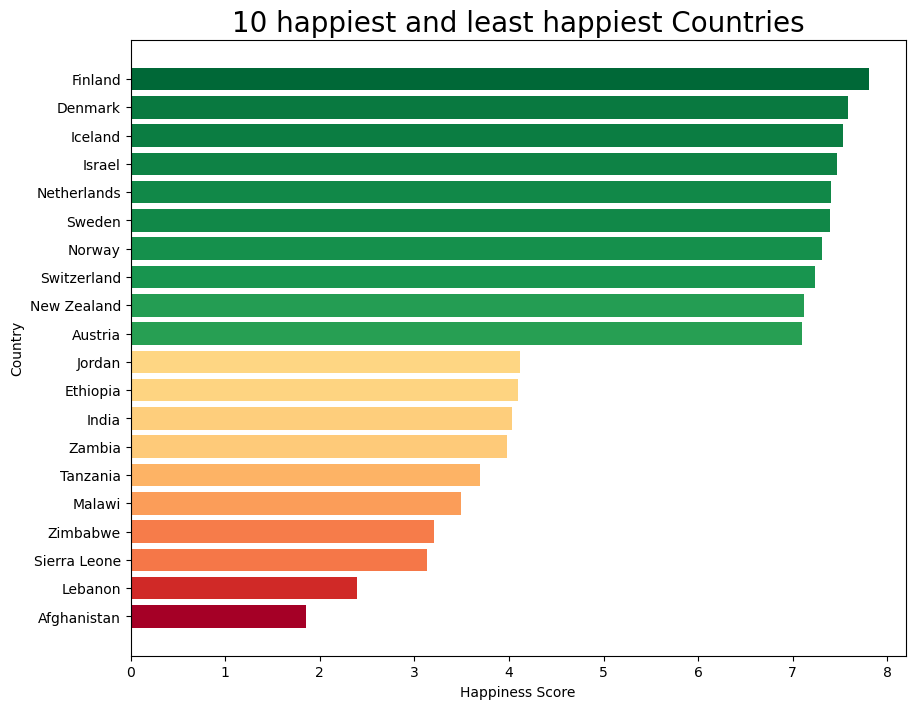

In [117]:
# Happiest and Unhappiest Countries for Year 2023 
top10 = df9.set_index('country')['happiness_score'].nlargest(10).to_frame()
bottom10 = df9.set_index('country')['happiness_score'].nsmallest(10).to_frame()
dfconcat = pd.concat([top10, bottom10], axis=0)
dfconcat = dfconcat.sort_values(by="happiness_score")

fig = plt.figure(figsize=(10,8))
cmap = plt.cm.RdYlGn
norm = plt.Normalize(vmin=dfconcat['happiness_score'].min(), vmax=dfconcat['happiness_score'].max())
colors = [cmap(norm(value)) for value in dfconcat['happiness_score']]

g = plt.barh(y=dfconcat.index, width=dfconcat["happiness_score"], color= colors)
plt.ylabel("Country")
plt.xlabel("Happiness Score")
plt.title("10 happiest and least happiest Countries", fontsize = 20)

plt.show()


# Interactive Sunburst Chart Using Plotly express library

In [120]:
fig = px.sunburst(data_frame= df9,
                  path=["region", "sub_region", "country"],
                  values="happiness_score",
                  color="happiness_score",
                  color_continuous_scale='RdYlGn',
                  width=900, 
                  height=900,
                  title = 'Happiness score sunburst - region / sub region / country')
fig.show()

# Exporting Final Dataframes in to CSVs in resources folder

In [111]:
df1.to_csv("./resources/whr_2015.csv", index = False)

In [112]:
df2.to_csv("./resources/whr_2016.csv", index = False)

In [113]:
df3.to_csv("./resources/whr_2017.csv", index = False)

In [114]:
df4.to_csv("./resources/whr_2018.csv", index = False)

In [115]:
df5.to_csv("./resources/whr_2019.csv", index = False)

In [116]:
df6.to_csv("./resources/whr_2020.csv", index = False)

In [117]:
df7.to_csv("./resources/whr_2021.csv", index = False)

In [118]:
df8.to_csv("./resources/whr_2022.csv", index = False)

In [119]:
df9.to_csv("./resources/whr_2023.csv", index = False)

In [8]:
#importes all the CSVs TO MongoDB through graphic user interface in mongo compass and validating now 

In [1]:
#Validation
from pymongo import MongoClient
client = MongoClient("mongodb://localhost:27017")
db = client.world_happiness_db

collection = db.whr

In [2]:
collection.find_one()

{'_id': ObjectId('655ef149b4c450efcd5f28af'),
 'year': 2015,
 'country': 'Switzerland',
 'region': 'Europe',
 'sub_region': 'Western Europe',
 'iso_alpha': 'CHE',
 'happiness_score': 7.587,
 'gdp_per_capita': 1.39651,
 'social_support': 1.34951,
 'life_expectancy': 0.94143,
 'freedom_to_make_life_choices': 0.66557,
 'generosity': 0.29678,
 'perceptions_of_corruption': 0.41978}

In [7]:
list(collection.find({}))

[{'_id': ObjectId('655ef149b4c450efcd5f28af'),
  'year': 2015,
  'country': 'Switzerland',
  'region': 'Europe',
  'sub_region': 'Western Europe',
  'iso_alpha': 'CHE',
  'happiness_score': 7.587,
  'gdp_per_capita': 1.39651,
  'social_support': 1.34951,
  'life_expectancy': 0.94143,
  'freedom_to_make_life_choices': 0.66557,
  'generosity': 0.29678,
  'perceptions_of_corruption': 0.41978},
 {'_id': ObjectId('655ef149b4c450efcd5f28b0'),
  'year': 2015,
  'country': 'Iceland',
  'region': 'Europe',
  'sub_region': 'Northern Europe',
  'iso_alpha': 'ISL',
  'happiness_score': 7.561,
  'gdp_per_capita': 1.30232,
  'social_support': 1.40223,
  'life_expectancy': 0.94784,
  'freedom_to_make_life_choices': 0.62877,
  'generosity': 0.4363,
  'perceptions_of_corruption': 0.14145},
 {'_id': ObjectId('655ef149b4c450efcd5f28b1'),
  'year': 2015,
  'country': 'Denmark',
  'region': 'Europe',
  'sub_region': 'Northern Europe',
  'iso_alpha': 'DNK',
  'happiness_score': 7.527,
  'gdp_per_capita': 1.